# Getting Started

## Project Briefing:

"Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating."

## Libraries and Languages

This project was created using the following languages and libraries:

- glob, os, 
- Matplotlib version: 3.1.1
- Pandas version: 3.1.1
- Numpy version: 1.16.5
- Seaborn version: 0.9.0

In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
%matplotlib inline

## Data Overview

The datasets used in this notebook include a wide range of related data

- Box Office Mojo:
  - bom.movie_gross.csv.gz
  

- IMDB:
  - imdb.title.crew.csv.gz
  - imdb.title.akas.csv.gz
  - imdb.title.ratings.csv.gz
  - imdb.name.basics.csv.gz
  - imdb.title.basics.csv.gz
  - imdb.title.principals.csv.gz



- TMDB:
  - tmdb.movies.csv.gz



- The Numbers:
  - tn.movie_budgets.csv.gz

In [2]:
#loads the data into a dictionary of dataframes

csv_files = glob("./zippedData/*.csv.gz")
csv_files_dict = {}
filenames_cleaned = []
for filename in csv_files:
    # cleaning the filenames
    filename_cleaned = os.path.basename(filename).replace(".csv", "")
    filename_cleaned = filename_cleaned.replace(".", "_") 
       
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df
    
    filenames_cleaned.append(filename_cleaned)

In [3]:
# creates a second dictionary of data frames (identical to the above)
# this is the one to be manipulated, 
# as csv_files_dict will be kept as the original


df_repository = {} 
for filename in filenames_cleaned:
        
    # executes text as code:
    
    df_repository[filename] = csv_files_dict[filename]
   # exec("""df_repository[""" + """'""" 
    #     + #filename_cleaned + """']""" )

In [4]:
filenames_cleaned

['bom_movie_gross_gz',
 'imdb_name_basics_gz',
 'imdb_title_akas_gz',
 'imdb_title_basics_gz',
 'imdb_title_crew_gz',
 'imdb_title_principals_gz',
 'imdb_title_ratings_gz',
 'tmdb_movies_gz',
 'tn_movie_budgets_gz']

In [5]:
# testing

for filename in filenames_cleaned:
    print(df_repository[filename].shape)

(3387, 4)
(606648, 5)
(331703, 7)
(146144, 5)
(146144, 2)
(1028186, 5)
(73856, 2)
(26517, 9)
(5782, 5)


After initial analysis and some data cleaning, the datasets which ultimately were used to draw conclusion were:
- imdb_title_basics_gz
- tn_movie_budgets_gz
- imdb_name_basics_gz

## Custom Functions

In the course of the data exploration and analysis conducted in this notebook, the follow custom functions were used:

- **intersection(lst1, lst2)**: returns the intesection of elements between two lists


In [6]:
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2))

- **series_string_to_float(dataseries)**: cleans a data series that is populated by strings, whose values actually refer to numbers. 

In [7]:
# the function below cleans a data series that is populated by strings, 
# whose values actually refer to numbers


# takes a series as an argument and returns a new series of float values

def series_string_to_float(dataseries):
    # iterates through rows of the series
    
    float_list = []
    for string in dataseries:
        # It assumes that the series is populated by financial figures 
        # such as '$100,000'
        clean_string = string.replace('$', '') # removes '$' 
        clean_string = clean_string.replace(',', '') # removes ','
        float_list.append(  float(clean_string) )
    
    float_dict = {'new_column': float_list} 
    return pd.DataFrame(float_dict)

- **clean_duplicates(dataframe)**: returns a dataframe without duplicates

In [8]:
# returns a dataframe without duplicates

def clean_duplicates(dataframe): 
    cleaned_filter = dataframe.duplicated()
    index_to_drop = dataframe.loc[cleaned_filter].index
    return dataframe.drop(index=index_to_drop)

- **is_prof(series, profession1, profession2=None)**: iterates through a data series and returns a data frame with one column, whose values are 1 when profession (string) is found, or 0 if not found

In [9]:
# function takes as arguments:
    # a series containing lists of professions 
    # a profession to screen for 
    # a second profession (optional)
    
# iterates through series and returns a data frame 
# with one column
# whose values are 1 when profession is found, 
# or 0 if not found
# the index of returned DF is not the original

def is_prof(series, profession1, profession2=None):
    
    prof_list = []
    
    # iterates through series
    for lst in series:
        # tests for profession 
        if (profession1 in lst):
            prof_list.append(1)
        else: 
            # and tests for second profession (optional) 
            if (profession2) and (profession2 in lst):
                prof_list.append(1)
            else:
                prof_list.append(0)
    
    prof_dict = {('is_' + str(profession1)): prof_list}
    return pd.DataFrame(prof_dict)

# Questions and Assumptions

This notebook explores and cleans the raw data in order to answer the following questions:


- **What is the relationship between movie grossings and the people who take part in the project?**

  - the underlying assumption is that even though there is a two way relationship between the success of a movie and that of a professional (one thing promotes the other), outlier professionals will have an outsized impact in the movie's results.

- **Do directors, actors and producers have the same impact on the financial results of a movie?**

  - the underlying assumption in this case is that roles with bigger responsabilities (directors, producers) have a larger impact than others (actors, for example)
     
  
- **Are any genres more risky than other in terms of financial performance?**
  - the underlying assumption is that there will be differences among differnt genres
  
  
- **What part does genre play in the financial results of a movie?**
  - the underlying assumption is that some genres will generate better results than others  

 # Data Cleaning and Exploration

## Deletion of  all duplicate rows from all data sets

In [10]:
# loop to parse the data frames df_repository 
# and returns them without duplicates

# uses the customs function  clean_duplicates()  

for db in df_repository.keys(): 
    df_repository[db] = clean_duplicates(df_repository[db])

In [11]:
# testing

for db in df_repository.keys(): 
    print(df_repository[db].duplicated().sum())

0
0
0
0
0
0
0
0
0


## **tn_movie_budgets_gz** 

Changing data stored as strings into floats (financial figures) or into datetime (release date)

### Cleaning columns with numerical data, but stored as strings

In [12]:
# cleaning data from  **df_repository['tn_movie_budgets_gz']**

# cleans columns with numerical data, but stored as strings

for key in df_repository['tn_movie_budgets_gz'].loc[:,['production_budget', 'domestic_gross', 'worldwide_gross']].keys():
    
    df_repository['tn_movie_budgets_gz'][key] = series_string_to_float(
                                                df_repository['tn_movie_budgets_gz'][key])

    


###  Changing data stored as string to datetime format for the column release_date

In [13]:
# string to datetime format for the column release_date
df_repository['tn_movie_budgets_gz'].release_date = pd.to_datetime(
    df_repository['tn_movie_budgets_gz'].release_date)

In [14]:
# testing

df_repository['tn_movie_budgets_gz'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 271.0+ KB


## First Merge
By merging **imdb_title_akas_gz** with **tn_movie_budgets_gz we can** we can cross **imdb** data with the financials from **tn**

In [15]:
# merging the DFs  **imdb_title_akas_gz**  and **tn_movie_budgets_gz** 


# merging on the movie name, so as to import the title_id 
# from the imdb tables to the new merged DF with financials
df_imdb_financials = pd.merge(
    df_repository['imdb_title_akas_gz'].reset_index(),
    df_repository['tn_movie_budgets_gz'], 
    left_on='title',right_on='movie', how='inner')


df_imdb_financials.drop(
    columns=['ordering', 'movie', 'region', 'language', 'types',
       'attributes', 'is_original_title'], inplace=True) 


#cleaning duplicates
df_imdb_financials = pd.DataFrame(clean_duplicates(df_imdb_financials))

In [16]:
df_imdb_financials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3858 entries, 0 to 10131
Data columns (total 6 columns):
title_id             3858 non-null object
title                3858 non-null object
release_date         3858 non-null datetime64[ns]
production_budget    3858 non-null float64
domestic_gross       3858 non-null float64
worldwide_gross      3858 non-null float64
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 211.0+ KB


### New Features 
Additionally, we can calculate profits  for the new merged table

In [17]:
#  calculates the profits and add it as a feature to **df_imdb_financials**

df_imdb_financials['total_profit'] =  (df_imdb_financials.worldwide_gross 
                                       - df_imdb_financials.production_budget)

df_imdb_financials.set_index('title_id', inplace=True)
    

In [18]:
df_imdb_financials.head()

,title,release_date,production_budget,domestic_gross,worldwide_gross,total_profit
title_id,,,,,,
tt0369610,Jurassic World,2015-06-12,215000000.0,179020854.0,6.542135e+08,439213485.0
tt0401729,John Carter,2012-03-09,260000000.0,200821936.0,5.864772e+08,326477240.0
tt1014759,Alice in Wonderland,2010-03-05,200000000.0,304360277.0,1.110527e+09,910526981.0
tt1014759,Alice in Wonderland,1951-07-28,200000000.0,125322469.0,3.654918e+08,165491792.0
tt1926979,Alice in Wonderland,2010-03-05,200000000.0,304360277.0,1.110527e+09,910526981.0


## **imdb_name_basics_gz**
Moving on to **imdb_name_basics_gz**. This data set gives us a list of people and lists their professions and movies which they participated in

### Increasing readability of listed professions
First we make the professions list more readable and accessible for further treatment and analysis.
We can also eliminate empty values so we only have rows that are useful for the desired analysis

In [19]:
# data cleaning for **imdb_name_basics_gz**

# splits the string values in primary_profession and known_for_titles into a list of strings

df_repository['imdb_name_basics_gz']['primary_profession'] = df_repository['imdb_name_basics_gz']['primary_profession'].str.split(',')
df_repository['imdb_name_basics_gz']['known_for_titles'] = df_repository['imdb_name_basics_gz']['known_for_titles'].str.split(',')


In [20]:
df_repository['imdb_name_basics_gz'].head()

,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061671,Mary Ellen Bauder,NaN,NaN,"[miscellaneous, production_manager, producer]","[tt0837562, tt2398241, tt0844471, tt0118553]"
nm0061865,Joseph Bauer,NaN,NaN,"[composer, music_department, sound_department]","[tt0896534, tt6791238, tt0287072, tt1682940]"
nm0062070,Bruce Baum,NaN,NaN,"[miscellaneous, actor, writer]","[tt1470654, tt0363631, tt0104030, tt0102898]"
nm0062195,Axel Baumann,NaN,NaN,"[camera_department, cinematographer, art_depar...","[tt0114371, tt2004304, tt1618448, tt1224387]"
nm0062798,Pete Baxter,NaN,NaN,"[production_designer, art_department, set_deco...","[tt0452644, tt0452692, tt3458030, tt2178256]"


### Deletion of rows
Rows with NaN either on known_for_titles column or on primary_profession were excluded

In [21]:
# data cleaning for **imdb_name_basics_gz**

# deletes rows with NaN either on known_for_titles column or on primary_profession

# selects index of rows to delete
filt1 = df_repository['imdb_name_basics_gz'].known_for_titles.isna()
filt2 = df_repository['imdb_name_basics_gz'].primary_profession.isna()

# merges them into a set
index_to_drop = set( 
    list( df_repository['imdb_name_basics_gz'].loc[filt1].index )
    + list( df_repository['imdb_name_basics_gz'].loc[filt2].index ))


df_repository['imdb_name_basics_gz'].drop(index=index_to_drop, inplace=True)

In [22]:
# testing
print(df_repository['imdb_name_basics_gz'].known_for_titles.isna().sum())
print(df_repository['imdb_name_basics_gz'].primary_profession.isna().sum())

0
0


### New Features - Professions

Adding new columns that tell if the person is an actor, a director or a producer

In [23]:
# adds features to **df_repository['imdb_name_basics_gz']**
# by using the custom function is_prof


# index reset to facilitate creation of features
df_repository['imdb_name_basics_gz'].reset_index(inplace=True) 


    # new columns that tell if the person is a:
    
        # an actor/actress
actor_col = is_prof(df_repository['imdb_name_basics_gz'].primary_profession, 
                           'actor', profession2='actress')

df_repository['imdb_name_basics_gz']['is_actor'] = actor_col.reset_index().is_actor


        # a producer 
prod_col = is_prof(df_repository['imdb_name_basics_gz'].primary_profession, 
                              'producer')

df_repository['imdb_name_basics_gz']['is_producer'] = prod_col.reset_index().is_producer

        # a director 
dir_col = is_prof(df_repository['imdb_name_basics_gz'].primary_profession, 
                              'director')

df_repository['imdb_name_basics_gz']['is_director'] = dir_col.reset_index().is_director

In [24]:
df_repository['imdb_name_basics_gz'].head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,is_actor,is_producer,is_director
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"[miscellaneous, production_manager, producer]","[tt0837562, tt2398241, tt0844471, tt0118553]",0,1,0
1,nm0061865,Joseph Bauer,NaN,NaN,"[composer, music_department, sound_department]","[tt0896534, tt6791238, tt0287072, tt1682940]",0,0,0
2,nm0062070,Bruce Baum,NaN,NaN,"[miscellaneous, actor, writer]","[tt1470654, tt0363631, tt0104030, tt0102898]",1,0,0
3,nm0062195,Axel Baumann,NaN,NaN,"[camera_department, cinematographer, art_depar...","[tt0114371, tt2004304, tt1618448, tt1224387]",0,0,0
4,nm0062798,Pete Baxter,NaN,NaN,"[production_designer, art_department, set_deco...","[tt0452644, tt0452692, tt3458030, tt2178256]",0,0,0


#### Deletion of rows

Cleans away rows of people who are neither a director, an actor nor a producer

In [25]:
# cleans away rows of people who are neither a director, 
# an actor nor a producer 

filt = (df_repository['imdb_name_basics_gz'].is_actor 
        + df_repository['imdb_name_basics_gz'].is_director 
        + df_repository['imdb_name_basics_gz'].is_producer) == 0

index_to_drop = df_repository['imdb_name_basics_gz'].loc[filt].index

df_repository['imdb_name_basics_gz'].drop(
    index=index_to_drop, inplace=True)

#testing
df_repository['imdb_name_basics_gz'].loc[filt].shape

(0, 9)

### New Features - cross reference with financial figures
Since we have access to financial information about several movies, we can cross reference that with the movies listed for each professional in **imdb_name_basics_gz**

In [26]:
# creates two new columns to **df_repository['imdb_name_basics_gz']** :
    
#     avg_grossing: will contain the average grossing of movies
#                   the person is known for
    
#     total_grossing: will contain the sum of grossing of movies
#                   the person is known for 
    

# will contain values selected for new avg_grossing colum    
avg_grossing_column = [] 

# will contain values selected for new avg_grossing colum
total_grossing_column = [] 


for row in df_repository['imdb_name_basics_gz'].known_for_titles:
    
    # colects the numbers computed for each row 
    grossing_row = [] 
    
    for movie in row:
        
        # checks if the movie being parsed 
        # is contained in the df_imdb_financials, 
        # which is where we can fetch the grossing figures
        if movie in df_imdb_financials.index: 
            
            # if a movie has more than 
            # one version (different relase dates, for ex),  
            # the loop will return a data series 
            # (slice of df_imdb_financials) instead
            # of a single value
            if isinstance(df_imdb_financials.loc[movie], pd.DataFrame):
                
                # in that case, we select the last value
                grossing = df_imdb_financials.loc[movie].iloc[-1,-1]
            
            # otherwise the single value found is selected
            else:
                grossing = df_imdb_financials.worldwide_gross.loc[movie] 
                
            # appends the value found to 
            # grossing_row for further computation
            grossing_row.append(grossing)
            
    # if after parsing the row, something is found:
    if len(grossing_row) > 0:
        
        # the average is calculated and appended to avg_grossing
        avg_grossing = sum(grossing_row)/len(grossing_row)
        avg_grossing_column.append(avg_grossing)
        
         #the total is calculated and appended to total_grossing
        total_grossing_column.append(sum(grossing_row))
        
    # otherwiser 0 is appended so that the final series
    # is the correct length 
    else:
        avg_grossing_column.append(0)
        total_grossing_column.append(0)

# dictionary with computed values
dict_grossings = {'avg_grossing': avg_grossing_column,
                  'total_grossing': total_grossing_column}

# new DF with computed values
df_professionals_grossings = pd.DataFrame(dict_grossings)

df_professionals_grossings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420019 entries, 0 to 420018
Data columns (total 2 columns):
avg_grossing      420019 non-null float64
total_grossing    420019 non-null float64
dtypes: float64(2)
memory usage: 6.4 MB


In [27]:
# adds the new columns from the newly created ***df_professionals_grossings***  
# into  ***df_repository['imdb_name_basics_gz']***


# resets index in order to create the new columns that 
# match df_professionals_grossings
df_repository['imdb_name_basics_gz'].reset_index(inplace=True)
df_repository['imdb_name_basics_gz'].drop(columns='index', inplace=True)

#creates the new columns
df_repository['imdb_name_basics_gz']['avg_grossing'] = df_professionals_grossings.loc[:,'avg_grossing']
df_repository['imdb_name_basics_gz']['total_grossing'] = df_professionals_grossings.loc[:,'total_grossing']


# additional data cleaning - drops columns **birth_year** 
# and  **primary_profession** 
df_repository['imdb_name_basics_gz'].drop(
    columns=['birth_year','primary_profession'], inplace=True)

df_repository['imdb_name_basics_gz'].head()

,nconst,primary_name,death_year,known_for_titles,is_actor,is_producer,is_director,avg_grossing,total_grossing
0,nm0061671,Mary Ellen Bauder,NaN,"[tt0837562, tt2398241, tt0844471, tt0118553]",0,1,0,1.508083e+09,3.016166e+09
1,nm0062070,Bruce Baum,NaN,"[tt1470654, tt0363631, tt0104030, tt0102898]",1,0,0,0.000000e+00,0.000000e+00
2,nm0062879,Ruel S. Bayani,NaN,"[tt2590280, tt0352080, tt0216559, tt2057445]",0,0,1,0.000000e+00,0.000000e+00
3,nm0063198,Bayou,NaN,"[tt6579724, tt0093116]",1,0,0,0.000000e+00,0.000000e+00
4,nm0063750,Lindsay Beamish,NaN,"[tt0404826, tt0111756, tt0367027, tt1492842]",1,0,0,0.000000e+00,0.000000e+00


#### Deleton of Rows
Drops rows where **avg_grossing** is zero

In [28]:
# additional cleaning - drops rows where **avg_grossing** is zero

filt = df_repository['imdb_name_basics_gz']["avg_grossing"] == 0
index_to_drop = df_repository['imdb_name_basics_gz'].loc[filt].index

df_repository['imdb_name_basics_gz'].drop(index=index_to_drop,inplace=True)

#testing
df_repository['imdb_name_basics_gz'].loc[filt].shape

(0, 9)

## **imdb_title_basics_gz**

Moving on to explore and clean data about movie genres

### Data Type Cleaning
Splits the string values in *genres* into a list of genres

In [29]:
# data cleaning

# splits the string values in *genres* into a list of genres
df_repository['imdb_title_basics_gz']['genres'] = df_repository[
    'imdb_title_basics_gz'].genres.str.split(',')

#testing
df_repository['imdb_title_basics_gz'].head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama]
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]"


### Row Deletions
Deleting rows where column *genre* is empty

In [30]:
# data cleaning

# finds rows where column *genre* is empty
filt = df_repository['imdb_title_basics_gz'].genres.isna()
index_to_drop = df_repository['imdb_title_basics_gz'].loc[filt].index

# drops those rows inplace
df_repository['imdb_title_basics_gz'].genres.drop(index=index_to_drop,
                                                  inplace=True)


In [31]:
#testing
df_repository['imdb_title_basics_gz'].genres.isna().sum()

0

In [32]:
# finds all unique values for genre

# loop to create a set of all genres in the column
genres_list = []
for row in df_repository['imdb_title_basics_gz'].genres:
    for genre in row:
        genres_list.append(genre)

genres_set = set(genres_list)

genres_set

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

### Subdividing 
Creates a DF for genres and their frequency

In [33]:
# what are the most commum genres?


# creates a df for  genres and their frequency
 
df_genres_ranking = pd.DataFrame({
    
    'n_movies': [   np.full(   len(genres_set), 0   )   ]},
    
    index = list(genres_set))


# loops through all listed genres and 
# updates **df_genres_ranking** with their instance count

for genre in df_genres_ranking.index:
    
    # is_prof() returns a specific column name
    returned_col_name = 'is_' + str(genre)
    
    # the count is calculated by passing the 'genres' column and
    # a genre name through is_prof() and adding up
    # all the positive results of the returned series
    n_instances = is_prof(df_repository['imdb_title_basics_gz'].genres,
                          genre)[returned_col_name].sum()
    
    # updates **df_genres_ranking** accordingly 
    df_genres_ranking.loc[genre, ['n_movies']] = n_instances
    
top_genres = list(
    df_genres_ranking.n_movies.nlargest(10).index)

top_genres

['Documentary',
 'Drama',
 'Comedy',
 'Thriller',
 'Horror',
 'Action',
 'Romance',
 'Biography',
 'Crime',
 'Adventure']

In [34]:
# renames the index of **df_repository['imdb_title_basics_gz']** 
# to facilitate merging later on

df_repository['imdb_title_basics_gz'].index.names = ['title_id']


## Second Merge
Merges   **imdb_title_basics_gz**   with information data from   **df_imdb_financials**

In [35]:
# merges   **df_repository['imdb_title_basics_gz']**   with 
# information data from   **df_imdb_financials** 

df_genres_financials = pd.merge(df_repository['imdb_title_basics_gz'], 
         df_imdb_financials.loc[:,['worldwide_gross', 'total_profit']], 
         on='title_id')

df_genres_financials.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3856 entries, tt0137204 to tt9899880
Data columns (total 7 columns):
primary_title      3856 non-null object
original_title     3856 non-null object
start_year         3856 non-null int64
runtime_minutes    3532 non-null float64
genres             3821 non-null object
worldwide_gross    3856 non-null float64
total_profit       3856 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 241.0+ KB


In [36]:
# data cleaning

# dropping columns
df_genres_financials.drop(columns = [
    'primary_title', 'original_title', 'start_year', 'runtime_minutes'], 
                          inplace=True)

#dropping rows with NaNs
filt_genres = df_genres_financials.genres.isna()
filt_gross = df_genres_financials.worldwide_gross.isna()
filt_profit = df_genres_financials.total_profit.isna()


index_to_drop = set(
    list( df_genres_financials.loc[filt_genres].index ) 
    + list( df_genres_financials.loc[filt_gross].index ) 
    + list( df_genres_financials.loc[filt_profit].index ))

df_genres_financials.drop(index = index_to_drop, inplace=True)

In [37]:
# testing
print(df_genres_financials.genres.isna().sum() 
      + df_genres_financials.worldwide_gross.isna().sum() 
      + df_genres_financials.total_profit.isna().sum())

df_genres_financials.info()

0
<class 'pandas.core.frame.DataFrame'>
Index: 3821 entries, tt0137204 to tt9899880
Data columns (total 3 columns):
genres             3821 non-null object
worldwide_gross    3821 non-null float64
total_profit       3821 non-null float64
dtypes: float64(2), object(1)
memory usage: 119.4+ KB


In [38]:
# resets index to facilitate future merges
df_genres_financials.reset_index(inplace=True)

In [39]:
# adds new columns to df_genres_financials
# indicating which genres are applicable

for genre in top_genres:
    
    # is prof() returns a on column DF with 1s or 0s
    genre_df = is_prof(df_genres_financials.genres, genre)
    
    # follows the logic of is_prof() to select col name
    returned_col = 'is_' + str(genre) 
    df_genres_financials[genre] = genre_df[returned_col]
    
df_genres_financials.head()
    

,title_id,genres,worldwide_gross,total_profit,Documentary,Drama,Comedy,Thriller,Horror,Action,Romance,Biography,Crime,Adventure
0,tt0137204,"[Adventure, Animation, Comedy]",1.123062e+09,9.480616e+08,0,0,1,0,0,0,0,0,0,1
1,tt0249516,"[Action, Animation, Comedy]",1.517936e+09,1.292936e+09,0,0,1,0,0,1,0,0,0,0
2,tt0293429,"[Action, Adventure, Fantasy]",1.084439e+09,8.094391e+08,0,0,0,0,0,1,0,0,0,1
3,tt0337692,"[Adventure, Drama, Romance]",8.675003e+08,6.175003e+08,0,1,0,0,0,0,1,0,0,1
4,tt0339736,[Horror],1.242521e+09,1.042521e+09,0,0,0,0,1,0,0,0,0,0


## Second approach to  **imdb_title_basics_gz**

In [40]:
# creating new dataframe for second analysis into genres

df_imdb_genre = csv_files_dict['imdb_title_basics_gz']

### Data Cleaning And New Features

In [41]:
# checking NaNs 
df_imdb_genre['genres'].isna().sum()

5408

In [42]:
#Remove all rows with NaN values in genres

df_imdb_genre = df_imdb_genre[df_imdb_genre['genres'].notna()]

In [43]:
#Check it NaN's are removed
df_imdb_genre['genres'].isna().sum()

0

In [44]:
# Now we have a clean data frame let's dataframes

#loading a DF for TN Financials
df_tn_financials = csv_files_dict['tn_movie_budgets_gz']

In [45]:


#Using merge and using a left join. As col names are different, using left_on and right_on options

movie_details_df = pd.merge(df_tn_financials, df_imdb_genre, left_on=  ['movie'],
                   right_on= ['primary_title'], 
                   how = 'left')

# Cleaning duplicates
movie_details_df = clean_duplicates(movie_details_df)

In [46]:
#Check the dataframe

movie_details_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Avatar,Abatâ,2011.0,93.0,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN,NaN,NaN,NaN


In [47]:

#Check the information

movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7158 entries, 0 to 7161
Data columns (total 10 columns):
release_date         7158 non-null object
movie                7158 non-null object
production_budget    7158 non-null object
domestic_gross       7158 non-null object
worldwide_gross      7158 non-null object
primary_title        3739 non-null object
original_title       3739 non-null object
start_year           3739 non-null float64
runtime_minutes      3309 non-null float64
genres               3739 non-null object
dtypes: float64(2), object(8)
memory usage: 615.1+ KB


In [48]:
#Removing NaN values from genres column

movie_details_df = movie_details_df[movie_details_df['genres'].notna()]

In [49]:
#Genre is a list of upto 3 genres, splitting it to get the individual genres

movie_details_df['genres'] = movie_details_df['genres'].apply(lambda x: x.split(",") if x else x)
movie_details_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Avatar,Abatâ,2011.0,93.0,[Horror]
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"[Action, Adventure, Fantasy]"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix,Dark Phoenix,2019.0,113.0,"[Action, Adventure, Sci-Fi]"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"[Action, Adventure, Sci-Fi]"
6,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"[Action, Adventure, Sci-Fi]"


In [50]:
#Select only the first value in the list in genre column

single_genres = pd.DataFrame(movie_details_df['genres'].values.tolist()).iloc[:, [0]]
movie_details_df['genres'] = single_genres

In [51]:
# cleaning the data type of
# numerical data

movie_details_df['production_budget'] = series_string_to_float(
    movie_details_df['production_budget'])

movie_details_df['worldwide_gross'] = series_string_to_float(
    movie_details_df['worldwide_gross'])

movie_details_df['domestic_gross'] = series_string_to_float(
    movie_details_df['domestic_gross'])


In [52]:

#Check it worked

movie_details_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,Avatar,Abatâ,2011.0,93.0,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,Action
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,Dark Phoenix,Dark Phoenix,2019.0,113.0,Action
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,Action
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,200074175.0,8.796209e+08,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,Action


In [53]:
# adding features

movie_details_df['total_profit'] = (movie_details_df.worldwide_gross 
                                    - movie_details_df.production_budget) 

movie_details_df['profit_margin'] = (movie_details_df.total_profit 
                                     / movie_details_df.worldwide_gross )

In [54]:
movie_details_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title,original_title,start_year,runtime_minutes,genres,total_profit,profit_margin
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,Avatar,Abatâ,2011.0,93.0,Horror,2.351345e+09,0.846921
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,Action,6.350639e+08,0.607331
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,Dark Phoenix,Dark Phoenix,2019.0,113.0,Action,-2.002376e+08,-1.337036
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,Action,1.072414e+09,0.764364
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,200074175.0,8.796209e+08,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,Action,5.796209e+08,0.658944


In [55]:

#Drop the columns which aren't useful

genre_profit_df = (movie_details_df.drop(columns=['release_date', 
                                                  'primary_title',
                                                  'original_title', 
                                                  'runtime_minutes']))
genre_profit_df.head()

,movie,production_budget,domestic_gross,worldwide_gross,start_year,genres,total_profit,profit_margin
0,Avatar,425000000.0,760507625.0,2.776345e+09,2011.0,Horror,2.351345e+09,0.846921
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011.0,Action,6.350639e+08,0.607331
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019.0,Action,-2.002376e+08,-1.337036
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015.0,Action,1.072414e+09,0.764364
6,Avengers: Infinity War,300000000.0,200074175.0,8.796209e+08,2018.0,Action,5.796209e+08,0.658944


In [56]:

#Let's group by genre averages

genre_mean_df = genre_profit_df.groupby('genres').mean()
genre_mean_df.head()

,production_budget,domestic_gross,worldwide_gross,start_year,total_profit,profit_margin
genres,,,,,,
Action,7.078734e+07,7.417512e+07,2.026795e+08,2014.482323,1.318922e+08,-inf
Adventure,7.427171e+07,8.947397e+07,2.515299e+08,2014.467153,1.772582e+08,-inf
Animation,4.356622e+07,7.103578e+07,1.770292e+08,2014.333333,1.334630e+08,-inf
Biography,2.502755e+07,3.873919e+07,8.220790e+07,2014.096154,5.718035e+07,-inf
Comedy,2.079912e+07,2.937340e+07,5.432770e+07,2014.302326,3.352857e+07,-inf


In [57]:
#Sort by top genres profits - decreasing

genre2_mean_df = genre_mean_df.sort_values(by='total_profit', ascending=False)
genre_mean_df.head()

,production_budget,domestic_gross,worldwide_gross,start_year,total_profit,profit_margin
genres,,,,,,
Action,7.078734e+07,7.417512e+07,2.026795e+08,2014.482323,1.318922e+08,-inf
Adventure,7.427171e+07,8.947397e+07,2.515299e+08,2014.467153,1.772582e+08,-inf
Animation,4.356622e+07,7.103578e+07,1.770292e+08,2014.333333,1.334630e+08,-inf
Biography,2.502755e+07,3.873919e+07,8.220790e+07,2014.096154,5.718035e+07,-inf
Comedy,2.079912e+07,2.937340e+07,5.432770e+07,2014.302326,3.352857e+07,-inf


In [58]:
#To keep graph neat let's select the top 10 genres

genres_top10_df = genre2_mean_df[:10]
genres_top10_df.head()

,production_budget,domestic_gross,worldwide_gross,start_year,total_profit,profit_margin
genres,,,,,,
Family,5.851500e+07,1.910335e+08,4.990225e+08,2015.500000,4.405075e+08,-inf
Fantasy,7.347500e+07,1.160192e+08,3.211385e+08,2014.500000,2.476635e+08,-inf
Adventure,7.427171e+07,8.947397e+07,2.515299e+08,2014.467153,1.772582e+08,-inf
Musical,2.132857e+07,6.989709e+07,1.729049e+08,2013.142857,1.515763e+08,-0.663679
Animation,4.356622e+07,7.103578e+07,1.770292e+08,2014.333333,1.334630e+08,-inf


# Data Visualization



## What is the relationship between movie grossings and the people who take part in the project?

Below we plot the distrubution curves of All Movie Grossings and of a Professional's Average Movie Grossing 

C:\Users\felip\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


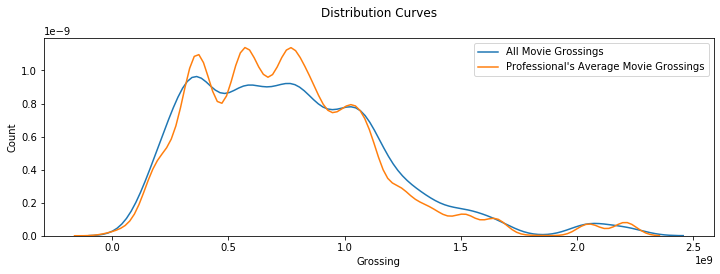

In [59]:
# plots the distrubution curves of All Movie Grossings 
# and of Avg Grossing of the movies a given professional
# participated in

plt.figure(figsize=(12, 8))

# subplot for Movie Grossings
ax1 = plt.subplot(211)
ax1 = sns.distplot(df_imdb_financials.worldwide_gross, 
                   hist=False, 
                   label='All Movie Grossings' )

# subplot for Professional's Movies Avg Grossing
ax2 = plt.subplot(211)
ax2 = sns.distplot(df_repository['imdb_name_basics_gz'].avg_grossing, 
                   hist=False, 
                   label="Professional's Average Movie Grossings" )

plt.legend()
plt.xlabel("Grossing")
plt.ylabel("Count")
plt.title("""Distribution Curves
""")

plt.show()

We can see no significant divergence in the composition of the distribution curves. 

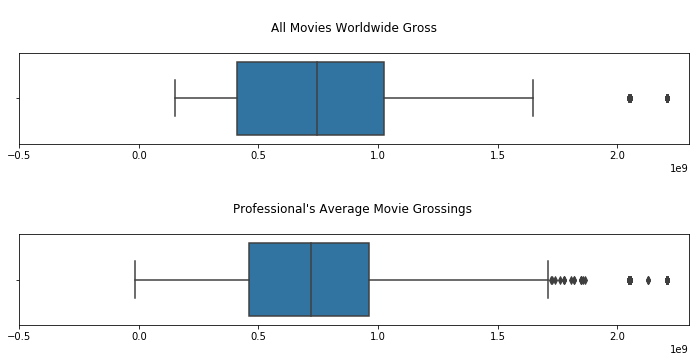

In [60]:
# plots a boxplot for distribution and details the measures of centrality, 
# the outliers and compares all movies vs movies of a given professional

plt.figure(figsize=(12, 5)).subplots_adjust(hspace= 1)

y_inf_limit = -500000000
y_sup_limit = 2300000000

# subplot for All Movies Worldwide Gross
ax1 = plt.subplot(211)
ax1 = sns.boxplot(df_imdb_financials.worldwide_gross  )
ax1.set_title(""" 
All Movies Worldwide Gross
""")
ax1.set_xlabel(' ')
ax1.set_xlim(y_inf_limit, y_sup_limit)

#subplot for Professional's Average Movie Grossings
ax2 = plt.subplot(212)
ax2 = sns.boxplot(df_repository['imdb_name_basics_gz'].avg_grossing)
ax2.set_title(""" 
Professional's Average Movie Grossings 
""")
ax2.set_xlabel(' ')
ax2.set_xlim(y_inf_limit, y_sup_limit)


plt.show()

The charts are not radically different.
However, we can note that:
- the bottom 25% of professionals present worse financial performances than the bottom 25% of all movies. We can thus infer that low performing professionals have an outsized negative impact on the financial performance of a movie

Recommendation: 
- Best to completely avoid key collaborators with sub par performance, as they have an out sized negative impact on financial results.

## Do directors, actors and producers have the same impact on the financial results of a movie?

In [61]:
# Creates subsets of **imdb_name_basics_gz** 
# for Directors, Actors and Producers


# filters and slices for Directors
filt = df_repository['imdb_name_basics_gz'].is_director == 1
df_directors = df_repository['imdb_name_basics_gz'].loc[filt]


# filters and slices for Actors
filt1 = df_repository['imdb_name_basics_gz'].is_actor == 1
df_actors = df_repository['imdb_name_basics_gz'].loc[filt1]


# filters and slices for Producers
filt2 = df_repository['imdb_name_basics_gz'].is_producer == 1
df_producers = df_repository['imdb_name_basics_gz'].loc[filt2]

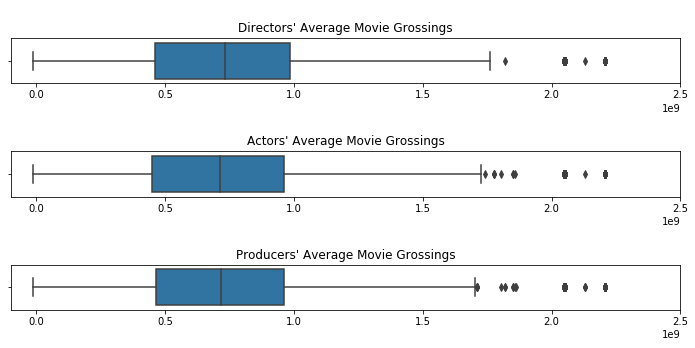

In [62]:
# plots a boxplot for distribution and details the measures of centrality, 
# the outliers and compares different professions

y_inf_limit = -100000000
y_sup_limit = 2500000000

plt.figure(figsize=(12, 5)).subplots_adjust(hspace= 1.5)


# subplot for Directors
ax1 = plt.subplot(311)
ax1 = sns.boxplot(df_directors.avg_grossing )
ax1.set_title(""" 
Directors' Average Movie Grossings""")
ax1.set_xlabel(' ')

# subplot for Actors
ax2 = plt.subplot(312)
ax2 = sns.boxplot(df_actors.avg_grossing)
ax2.set_title(""" 
Actors' Average Movie Grossings""")
ax2.set_xlabel(' ')


# subplot for Producers
ax3 = plt.subplot(313)
ax3 = sns.boxplot(df_producers.avg_grossing)
ax3.set_title(""" 
Producers' Average Movie Grossings""")
ax3.set_xlabel(' ')


ax1.set_xlim(y_inf_limit, y_sup_limit)
ax2.set_xlim(y_inf_limit, y_sup_limit)
ax3.set_xlim(y_inf_limit, y_sup_limit)


plt.show()

The charts show an almost identical distribution for all three professions. From that we can infer that no professinal has a larger impact on the financial result than the others.

Recommendation: 
- Since all professional profiles appear to have homogeneous impact on financial performance, it is generally recommended that a production does not over allocate resources in a single professional. The composition of the team should rather be the focus of attention.


## Are any genres more risky than other in terms of financial performance?

For the purpose of this investigation, we will consider the fail rate to be the percentage of movies with profits below zero

In [63]:
df_genres_financials.keys()

Index(['title_id', 'genres', 'worldwide_gross', 'total_profit', 'Documentary',
       'Drama', 'Comedy', 'Thriller', 'Horror', 'Action', 'Romance',
       'Biography', 'Crime', 'Adventure'],
      dtype='object')

In [64]:
# loop to find the Fail Rate of each Genre
#         Fail Rate =  percentage of movies with profits below zero



cat_list = []
fail_rate_list = []


# parses the columns names ('Documentary','Drama', 'Comedy' etc)
for col in df_genres_financials.iloc[:,4:].keys():
    
    filt1 = (df_genres_financials[col] == 1)
    filt2 = (df_genres_financials.total_profit < 0)
    
    #filters and slices the rows that are marked for that genre
    
    index_to_filt = intersection(list(df_genres_financials.loc[filt1].index),
                                 list(df_genres_financials.loc[filt2].index))
    
    #calculates the fail rate
    fail_rate = (len(df_genres_financials.loc[index_to_filt]) 
                 / len(df_genres_financials.loc[filt1].index))
    

    cat_list.append(col)   
    fail_rate_list.append(fail_rate)
    

In [65]:
# creates DF with the fail rate data

df_fail_rate = pd.DataFrame({
    'Fail Rate': fail_rate_list,
    'Category': cat_list},
    index = list(range(len(cat_list))))


Text(0.5, 1, '\nFail Rate Of The 10 Most Commom Genres\n')

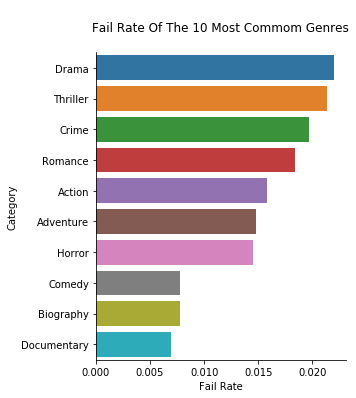

In [66]:
data = df_fail_rate.sort_values('Fail Rate', ascending=False)
sns.catplot(data=data, kind='bar', y="Category", x="Fail Rate", orient="h")
plt.title("""
Fail Rate Of The 10 Most Commom Genres
""")

The chart clearly show that some genres are more risky then others. A Drama is roughly 4 times more likely to fail than a documentary.

Recommendation: allocate resources in  accordance to expected losses; When producing content with riskier profiles, discount expected result by loss margin 

## What part does genre play in the financial results of a movie?

In [67]:
# calculates the avg profit for each of 
# the most commom genres


avg_profit_list = []

# parses the list of genres
for col in cat_list:
    
    # filters for the Genre 
    filt1 = (df_genres_financials[col] == 1)
    
    # calculates the avg profit
    avg_profit = (df_genres_financials.total_profit.loc[filt1].mean() 
                  / df_genres_financials.worldwide_gross.loc[filt1].mean())
    
    avg_profit_list.append(avg_profit)

# adds new column to  ** df_fail_rate **
df_fail_rate['Average Profit Margin'] = avg_profit_list

Text(0.5, 1, '\nAverage Profit of the 10 Most Commom Genres\n')

<Figure size 432x288 with 0 Axes>

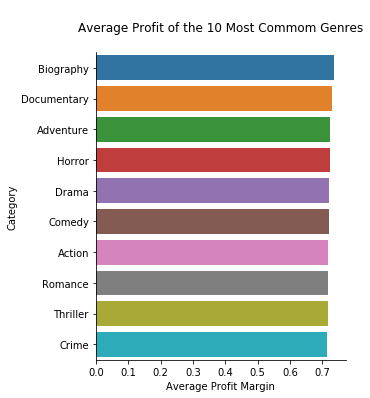

In [68]:
plt.figure()

data2 = df_fail_rate.sort_values('Average Profit Margin', ascending=False)
sns.catplot(data=data2, kind='bar', 
            y="Category", x="Average Profit Margin", orient="h")

plt.title("""
Average Profit of the 10 Most Commom Genres
""")


The data show a pretty homogenous performance across all genres. Therefore we cannot infer from this methodology  that the genres will influence the financial performance of a project 

### Second take on relationship between genres and profit margins

Text(0.5, 1.0, 'Profit by Genre')

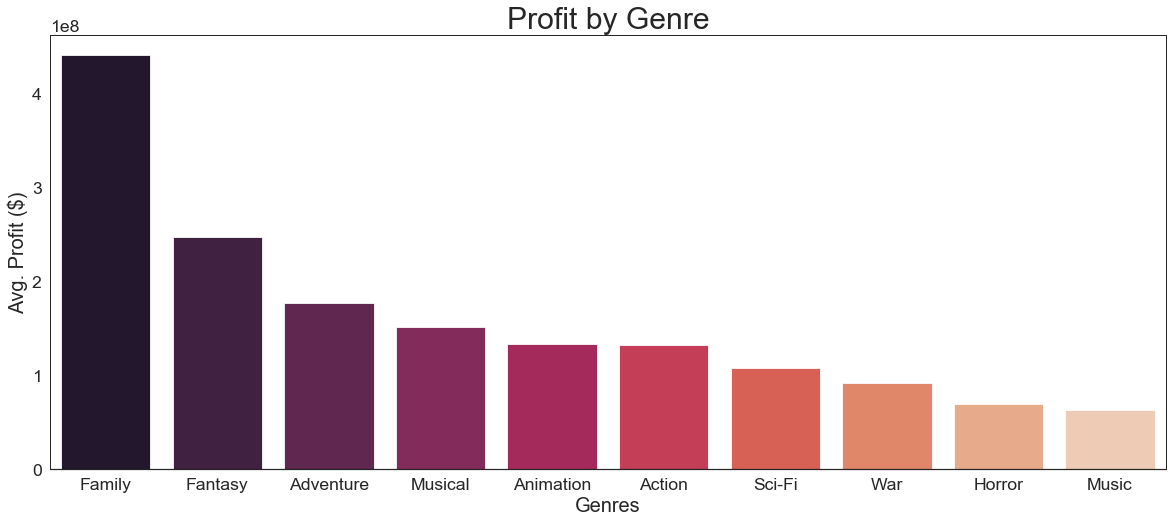

In [69]:
#Creates a bar chart of average profit of each genre - Profit / Genre 

genres_top10_df.reset_index(inplace=True)


sns.set_context("paper", font_scale = 2, rc={"grid.linewidth": 0.6})
plt.rcParams["axes.labelsize"] = 20
sns.set_style("white")
plt.figure(figsize=(20,8))
ax = sns.barplot(x='genres', y='total_profit', palette="rocket", data=genres_top10_df);
ax.set(xlabel="Genres", ylabel = "Avg. Profit ($)")
ax.axhline(0, color="k", clip_on=False)
ax.set_title('Profit by Genre', fontsize=30)
plt.xticks(rotation=70)

In [70]:
movie_details_df.reset_index(inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

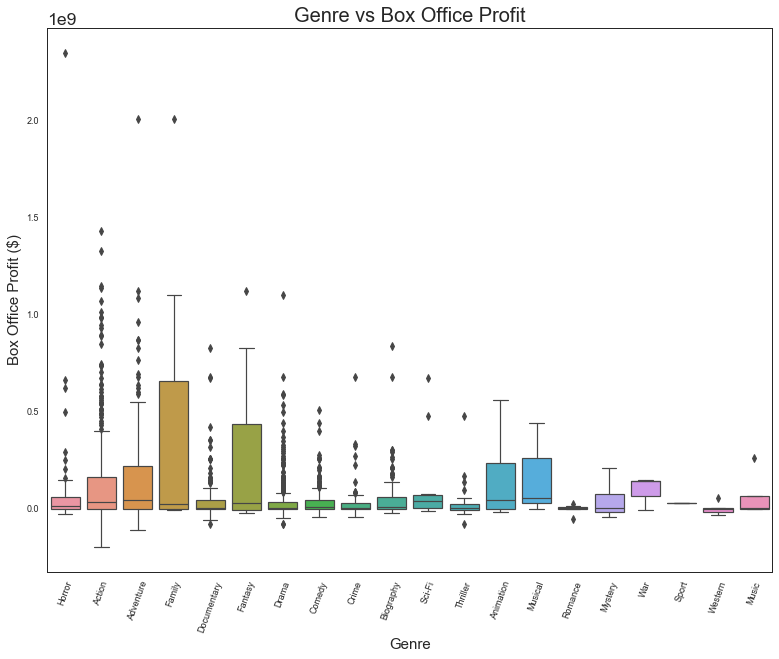

In [80]:
plt.figure(figsize=(13,10))

b = sns.boxplot(x="genres", y=('total_profit'), data=movie_details_df)
b.axes.set_title("Genre vs Box Office Profit",fontsize=20)
b.set_xlabel("Genre",fontsize=15)
b.set_ylabel("Box Office Profit ($)",fontsize=15)
b.tick_params(labelsize=9)
b.set_ylim=([150000000,0])
plt.xticks(rotation=70)

**Conclusion**
- The value creation is not equal among all genre types

**Recommendation**
- Proper allocation of resources into genres that create most values will benefit the company by allowing to take part in the biggest slices of profit in the market 